# **Titanic Survivors**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df= pd.read_csv('/content/train.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C



# Description of the attributes:
Pclass: Passenger class, (1 = 1st, 2 = 2nd, 3 = 3rd)

Survived: Survival,(0 = No, 1 = Yes)

Name: Name

Sex: Sex

Age: Age

SibSp: Number of Siblings/Spouses aboard the Titanic

Parch: Number of Parents /Children aboard the Titanic

Ticket: Ticket number

Fare: Passenger fare(British Pound)

Cabin: Cabin number

Embarked: Port of Embarkation(C = Cherbourg, Q = Queenstown, S = Southampton)


In [ ]:
df.shape

(891, 12)

In [ ]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Age, Cabin, and Embarked are missing values. Cabin has too many missing values, so we are dropping cabin column

In [ ]:
#removing the 'Cabin' column from the dataset

df.pop('Cabin')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Now, We will change the data in the Survived column from ones and zeros to 'Survived' and 'Died', and we'll change the classes to '1st Class', '2nd Class', and '3rd Class'.

In [ ]:
# Create Pclass Label Column
df['Class'] = df.Pclass.map({1 : 'First Class', 2 : 'Second Class', 3 : 'Third Class'})
df.Class.head()

0    Third Class
1    First Class
2    Third Class
3    First Class
4    Third Class
Name: Class, dtype: object

In [ ]:
# Create Survival Label Column
df['Survival'] = df.Survived.map({0 : 'Died', 1 : 'Survived'})
df.Survival.head()

0        Died
1    Survived
2    Survived
3    Survived
4        Died
Name: Survival, dtype: object

In [ ]:
#correlation: it will simply tell the values of corr of every column with every column
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [ ]:
df.groupby(['Sex'])['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

### **SEX**

In [ ]:
#Difference in survival between Male and Female and How many females survived and how many males?

male_female_survival = df.groupby('Sex').sum()['Survived']
male_female_survival

Sex
female    233
male      109
Name: Survived, dtype: int64

In [ ]:
#total number of male passengers and total number of female passengers

total_male_female = df['Sex'].value_counts()
total_male_female


male      577
female    314
Name: Sex, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


female    0.742038
male      0.188908
dtype: float64


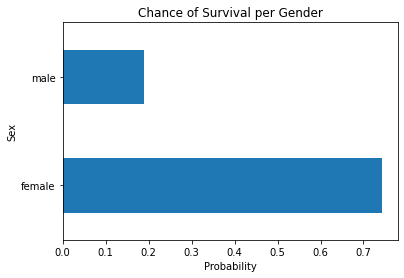

In [ ]:
#calculate probability of survival for male passengers and for female passengers, then plot the result

male_female_percentages = male_female_survival/total_male_female
print(male_female_percentages)
prob_gender = male_female_percentages.plot(kind='barh',title='Chance of Survival per Gender')
prob_gender.set_xlabel('Probability');
prob_gender.set_ylabel('Sex');

### **Class**

In [ ]:
#Difference in survival based on class

class_survival = df.groupby('Class').sum()['Survived']
class_survival

Class
First Class     136
Second Class     87
Third Class     119
Name: Survived, dtype: int64

In [ ]:
#Find the probabilites for each class.
#First print the total number of passengers in each class, then output the probabilities.

num_class = df['Class'].value_counts()
print(num_class)
percent_survived = class_survival/num_class
print(percent_survived)


Third Class     491
First Class     216
Second Class    184
Name: Class, dtype: int64
First Class     0.629630
Second Class    0.472826
Third Class     0.242363
dtype: float64


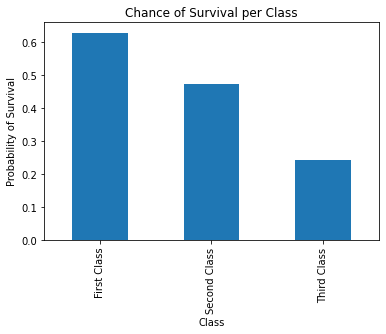

In [ ]:
#plot the resulting probabilities

class_survival = percent_survived.plot(kind='bar',title='Chance of Survival per Class')

class_survival.set_xlabel('Class');
class_survival.set_ylabel('Probability of Survival');



### **AGE and FARE**

The Age column seems like an important feature--unfortunately it is missing many values. We'll need to fill in the missing values.

Filter to view missing Age values:


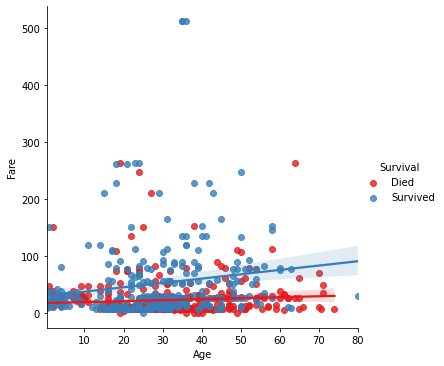

In [ ]:
#create a separate dataset that removes all rows without an age

unknown_age_removed = df.dropna(axis=0,how='any')
age_survived_and_not = sns.lmplot(x='Age', y='Fare', hue='Survival', data=unknown_age_removed, palette='Set1')


In [ ]:
#describe the ages of passengers on the Titanic

unknown_age_removed['Age'].describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
#Taking in the original dataset, put each person into one of four age groups: 
#Infant under 2, Child 2-12yrs, Adult 13-50yrs, or Older Adult 50+.

bins = [0,1,13,50,85]
age_groups = ['Infant','Child','Adult','Older Adult']
df['Age'] = pd.cut(df['Age'],bins,labels = age_groups)
df.head(5)

    


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Class,Survival
0,1,0,3,"Braund, Mr. Owen Harris",male,Adult,1,0,A/5 21171,7.2500,S,Third Class,Died
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Adult,1,0,PC 17599,71.2833,C,First Class,Survived
2,3,1,3,"Heikkinen, Miss. Laina",female,Adult,0,0,STON/O2. 3101282,7.9250,S,Third Class,Survived
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Adult,1,0,113803,53.1000,S,First Class,Survived
4,5,0,3,"Allen, Mr. William Henry",male,Adult,0,0,373450,8.0500,S,Third Class,Died


For unknown ages, find the best 'Age' group by looking at the form of address in each name.
    For 'Miss' and 'Master', put them in the 'Child' age group, and for 'Mrs', 'Mr.', and 'Dr.', 
    put them in the 'Adult' age group

In [ ]:

def find_age_group(row):
        
    if 'Miss.' in row['Name']:
        if pd.isnull(row['Age']):
            row['Age'] = 'Child'
        
    if 'Master.' in row['Name']:
        if pd.isnull(row['Age']):
            row['Age'] = 'Child'
            
    if 'Mrs.' in row['Name']:
        if pd.isnull(row['Age']):
            row['Age'] = 'Adult'
            
    if 'Mr.' in row['Name']:
        if pd.isnull(row['Age']):
            row['Age'] = 'Adult'
        
    if 'Dr.' in row['Name']:
        if pd.isnull(row['Age']):
            row['Age'] = 'Adult' 
        
    return row
        


In [ ]:
df = df.apply(find_age_group,axis=1)


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Class,Survival
0,1,0,3,"Braund, Mr. Owen Harris",male,Adult,1,0,A/5 21171,7.2500,S,Third Class,Died
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Adult,1,0,PC 17599,71.2833,C,First Class,Survived
2,3,1,3,"Heikkinen, Miss. Laina",female,Adult,0,0,STON/O2. 3101282,7.9250,S,Third Class,Survived
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Adult,1,0,113803,53.1000,S,First Class,Survived
4,5,0,3,"Allen, Mr. William Henry",male,Adult,0,0,373450,8.0500,S,Third Class,Died


In [ ]:
#number of survivors in each age group

each_age_group = df.groupby('Age').sum()['Survived']
each_age_group


Age
Adult          254
Child           54
Infant          12
Older Adult     22
Name: Survived, dtype: int64

([<matplotlib.patches.Wedge at 0x7fe5cb5150d0>,
 [Text(-0.7597515355514921, 0.7954731951657139, 'Adult'),
  Text(0.47857240914057364, -0.9904385135935433, 'Child'),
  Text(0.9576400241011674, -0.5412260010748888, 'Infant'),
  Text(1.0776140044716247, -0.22078962241606667, 'Older Adult')])

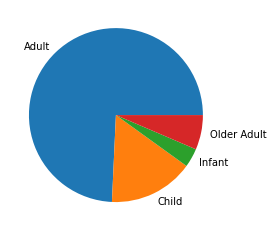

In [ ]:
#Pie Chart of survivors in each age group
age_survivors=[254,54,12,22]
agesurv_labels=['Adult','Child','Infant','Older Adult']
plt.pie(age_survivors,labels=agesurv_labels)

In [ ]:
#number of passengers in each age group

num_in_group = df['Age'].value_counts(sort=False)
print (num_in_group)

#chance of survival for those in each age group

age_survival = each_age_group/num_in_group
age_survival.sort_values(inplace=True)



Child           97
Infant          14
Older Adult     64
Adult          716
Name: Age, dtype: int64


([<matplotlib.patches.Wedge at 0x7fe5cb60de10>,
 [Text(1.036289212450884, 0.3689236616942953, 'Child'),
  Text(0.8171997185042671, 0.7363318681658065, 'Infant'),
  Text(0.5865248473082186, 0.9305850866471432, 'Older Adult'),
  Text(-0.8971569671019983, -0.6364820314669881, 'Adult')])

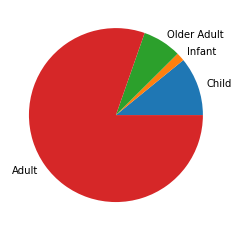

In [ ]:
#Pie Chart of chance of survival for those in each age group

age_chance_survivors=[97,14,64,716]
agechancesurv_labels=['Child','Infant','Older Adult','Adult']
plt.pie(age_chance_survivors,labels=agechancesurv_labels)

### Conclusion

**Assumptions after data visualization.**

1.It looks like there were over twice as many female survivors as there were male survivors, which may suggest a higher chance of survival if you were a female on the titanic. It's even more apparent when looking at the percentage of men that survived compared to the percentage of women. If you were a woman, you had almost a 75% chance of survival, but men had a little less than 20% chance.

2.Passengers from the First Class survived in higher number. 

3.First class Females were the top survivals.

4.Passengers who were travelling with family were higher chance of survival over the alone travellers.


